## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from scipy.stats import norm, skew, boxcox
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile

## Frame the Problem
1. What is the objective?<br>
The objective is to predict housing prices<br>

2. How will the solution be used?<br>
A good business application would be to compare predicted house values using the model to listed house prices at realtor websites. Then, with proper financing, one could buy the houses with the largest "margins of safety" and sell them for a profit<br>

3. What methods are used?<br>
Linear regression with Ridge, Lasso, and Elastic versions<br>

4. How is performance measured?<br>
RMSE is used to measure the performance of the model<br>

## Get Data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Explore Data

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There is an extra Id column. We will drop this.

In [4]:
df_train.drop("Id", axis=1, inplace=True)

In [5]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Alley, PoolQC, Fence, MiscFeature, FireplaceQu, Garage attributes, Basement Attributes, and MasVnrType all have missing values.

In [7]:
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


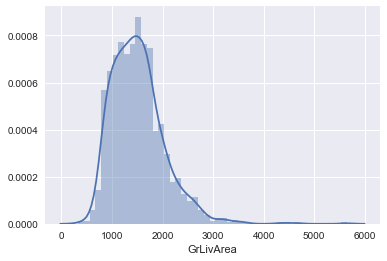

In [8]:
sns.distplot(df_train["GrLivArea"])

In [9]:
extreme_area = df_train[df_train["GrLivArea"] > 4000]

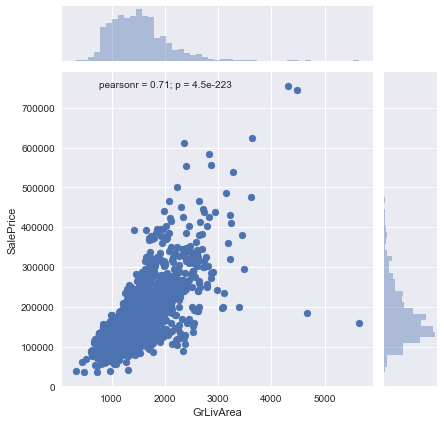

In [10]:
sns.jointplot(data=df_train, x="GrLivArea", y="SalePrice")

There seems to be outliers after 4000 area. We will remove these.

In [11]:
df_train = df_train[df_train["GrLivArea"] < 4000]

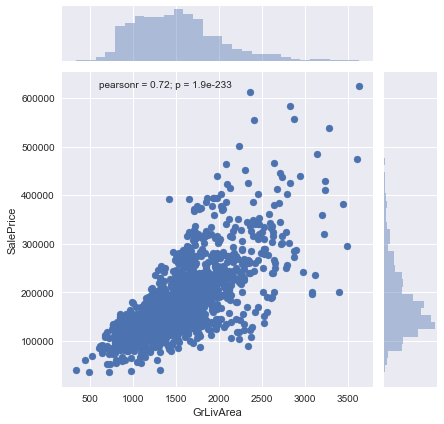

In [12]:
sns.jointplot(data=df_train, x="GrLivArea", y="SalePrice")

We still might have some issues with large living areas, but let's leave it for now.

In [13]:
def create_box_chart(independent, dependent="SalePrice"):
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=independent,y=dependent,data=df_train,palette='rainbow')

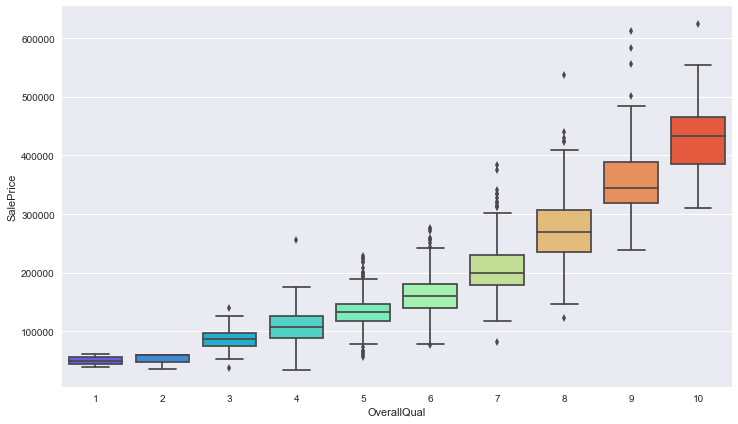

In [14]:
create_box_chart("OverallQual")

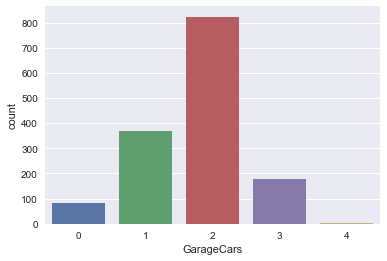

In [15]:
sns.countplot(df_train["GarageCars"])

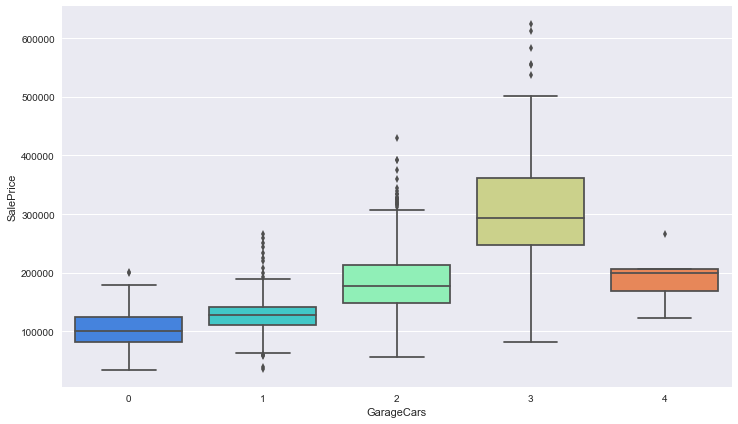

In [16]:
create_box_chart("GarageCars")

It looks like 4 car garages actually sell for less than 3 car garages.

In [17]:
df_train[df_train["GarageCars"]==4]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


In [18]:
garage_variables = [f for f in df_train.columns if "Garage" in f]
garage_variables

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [19]:
df_train[garage_variables].isnull().any()

GarageType       True
GarageYrBlt      True
GarageFinish     True
GarageCars      False
GarageArea      False
GarageQual       True
GarageCond       True
dtype: bool

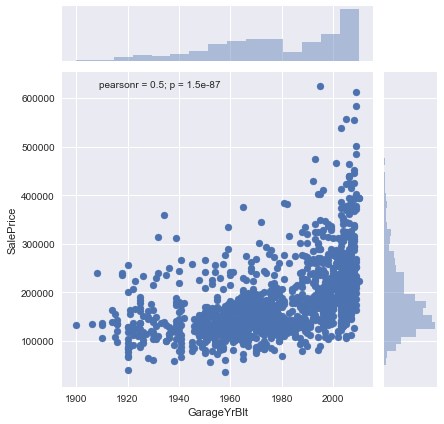

In [20]:
sns.jointplot(data=df_train, x="GarageYrBlt", y="SalePrice")

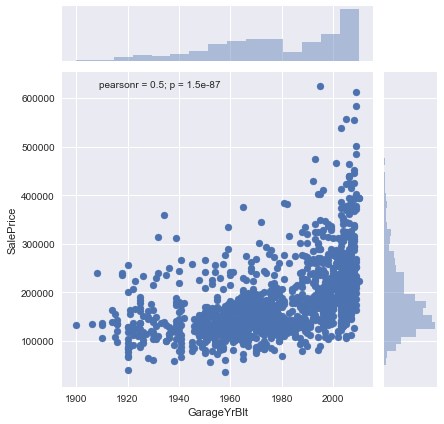

In [21]:
sns.jointplot(data=df_train, x="GarageYrBlt", y="SalePrice")

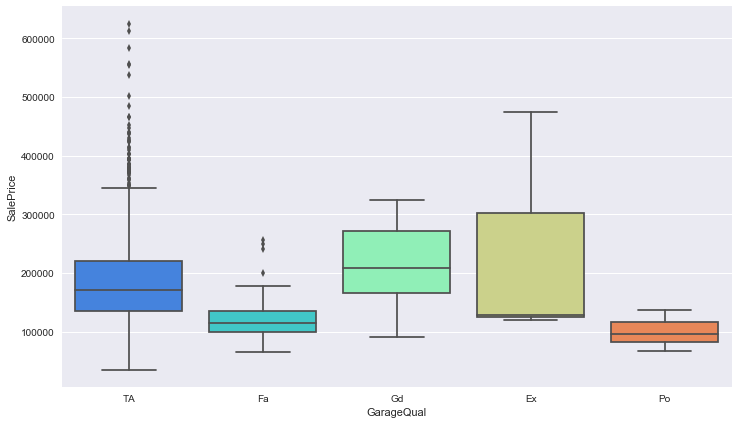

In [22]:
create_box_chart("GarageQual")

## Prepare Data

In [23]:
# clean garage variables NA means no garage
df_train["GarageType"].fillna("none", inplace=True)
df_train["GarageQual"].fillna("none", inplace=True)
df_train["GarageCond"].fillna("none", inplace=True)
df_train["GarageFinish"].fillna("none", inplace=True)

In [24]:
df_train["YearBuilt"].corr(df_train["GarageYrBlt"])

0.82519238408333206

In [25]:
garage_year_built = df_train["GarageYrBlt"]

In [26]:
df_train.drop("GarageYrBlt", axis=1, inplace=True)

In [27]:
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePrice, dtype: float64


In [28]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != object]
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == object]

In [29]:
# MasVnrArea and LotFrontage still have nans. In both cases nan probably means 0
df_train["LotFrontage"].fillna(0, inplace=True)
df_train["MasVnrArea"].fillna(0, inplace=True)

In [30]:
df_train[qualitative].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1456 non-null object
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-null object
MasVnrType       1448 non-null object
ExterQual        1456 non-null object
ExterCond        1456 non-null object
Foundation       1456 non-null object
BsmtQual         1419 non-null object
BsmtCond         1419 non-null object
BsmtExposure     1418

A lot of the qualitative features have missing values

In [31]:
# nan Alley likely means none
df_train["Alley"].fillna("none", inplace=True)
df_train["MasVnrType"].fillna("None", inplace=True)

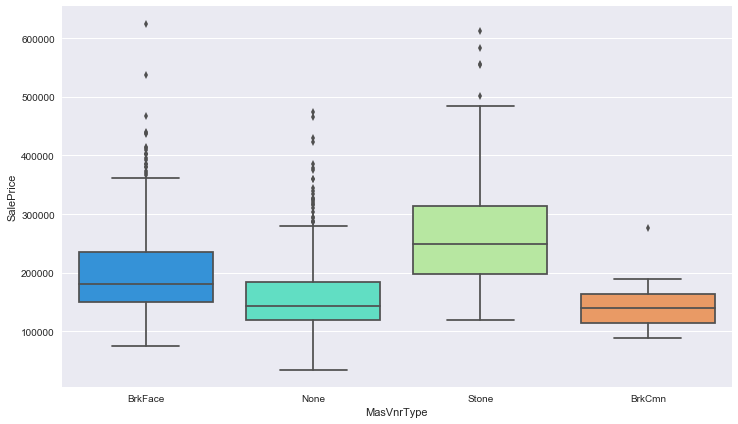

In [32]:
create_box_chart("MasVnrType")

In [33]:
## Get basement variables
basement_variables = [f for f in df_train.columns if "Bsmt" in f]

In [34]:
# fillnas
df_train['BsmtQual'].fillna(0, inplace=True)
df_train['BsmtCond'].fillna(0, inplace=True)
df_train['BsmtExposure'].fillna(0, inplace=True)
df_train['BsmtFinType1'].fillna(0, inplace=True)
df_train['BsmtFinType2'].fillna(0, inplace=True)

In [35]:
# fill fireplace, pool, fence and misc with 0
df_train['FireplaceQu'].fillna(0, inplace=True)
df_train['PoolQC'].fillna(0, inplace=True)
df_train['Fence'].fillna(0, inplace=True)
df_train['MiscFeature'].fillna(0, inplace=True)

In [36]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].astype("category")
df_train["FireplaceQu_Cat"] = df_train["FireplaceQu"].cat.codes

In [37]:
for col in df_train[qualitative].columns:
    df_train[col] = df_train[col].astype("category")
    df_train[col] = df_train[col].cat.codes

In [38]:
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice          1.000000
OverallQual        0.800858
GrLivArea          0.720516
GarageCars         0.649256
TotalBsmtSF        0.646584
GarageArea         0.636964
1stFlrSF           0.625235
FullBath           0.559048
TotRmsAbvGrd       0.537462
YearBuilt          0.535279
YearRemodAdd       0.521428
MasVnrArea         0.473650
Fireplaces         0.466765
BsmtFinSF1         0.395923
Foundation         0.388687
FireplaceQu_Cat    0.387854
FireplaceQu        0.387854
OpenPorchSF        0.330361
WoodDeckSF         0.322538
2ndFlrSF           0.297301
HalfBath           0.282925
LotArea            0.269866
CentralAir         0.258056
Electrical         0.239604
SaleCondition      0.238590
PavedDrive         0.237083
BsmtFullBath       0.235697
RoofStyle          0.224712
BsmtUnfSF          0.220678
Neighborhood       0.214060
                     ...   
MasVnrType         0.023682
LandContour        0.012407
Condition2         0.007957
GarageQual         0.005989
BsmtFinSF2        -0

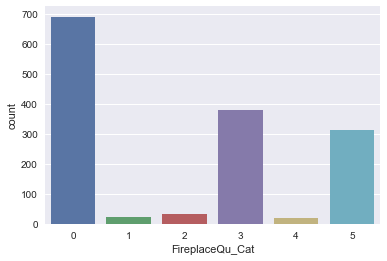

In [39]:
sns.countplot(df_train["FireplaceQu_Cat"])

In [40]:
df_train[quantitative].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 36 columns):
MSSubClass       1456 non-null int64
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
MasVnrArea       1456 non-null float64
BsmtFinSF1       1456 non-null int64
BsmtFinSF2       1456 non-null int64
BsmtUnfSF        1456 non-null int64
TotalBsmtSF      1456 non-null int64
1stFlrSF         1456 non-null int64
2ndFlrSF         1456 non-null int64
LowQualFinSF     1456 non-null int64
GrLivArea        1456 non-null int64
BsmtFullBath     1456 non-null int64
BsmtHalfBath     1456 non-null int64
FullBath         1456 non-null int64
HalfBath         1456 non-null int64
BedroomAbvGr     1456 non-null int64
KitchenAbvGr     1456 non-null int64
TotRmsAbvGrd     1456 non-null int64
Fireplaces       1456 non-null int64
G

In [41]:
total_square_feet = [f for f in df_train[quantitative] if "SF" in f]

In [42]:
total_square_feet

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [43]:
df_train["SquareFeet"] = df_train["TotalBsmtSF"] + df_train["1stFlrSF"] + df_train["2ndFlrSF"]

## First model
- skewed data
- no interaction terms

In [44]:
reg = LinearRegression()
X = df_train.drop("SalePrice", axis=1)
y = np.log1p(df_train["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [104]:
X["SalePrice"]

KeyError: 'SalePrice'

In [46]:
def scatter_results(test, predicted):
    plt.scatter(test, predicted)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

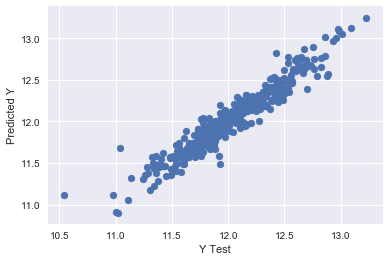

In [47]:
scatter_results(y_test, y_pred)

In [48]:
def errors(test, predicted):
    print('MAE:', metrics.mean_absolute_error(test, predicted))
    print('MSE:', metrics.mean_squared_error(test, predicted))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(test, predicted)))

In [49]:
errors(y_test, y_pred)

MAE: 0.082851400086
MSE: 0.0128751474355
RMSE: 0.113468706856


The simple model does surprisingly well

## Ridge

In [50]:
ridge = RidgeCV(alphas=[.01, .03, .06, .1, .3, .6, 1, 3, 6, 10, 30, 60])

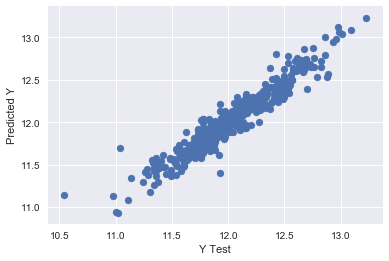

In [51]:
ridge.fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)
scatter_results(y_test, y_pred_rid)

In [52]:
errors(y_test, y_pred_rid)

MAE: 0.0839882777746
MSE: 0.0134008860697
RMSE: 0.115762196203


In [53]:
alpha = ridge.alpha_

In [54]:
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)

ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 84.0


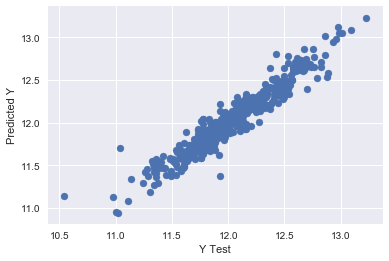

In [55]:
y_pred_rdg = ridge.predict(X_test)

scatter_results(y_test, y_pred_rdg)

In [56]:
errors(y_test, y_pred_rdg)

MAE: 0.0839149534122
MSE: 0.0135073634865
RMSE: 0.116221183467


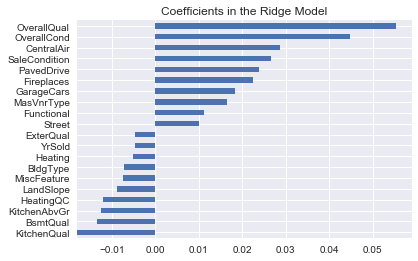

In [57]:
coefs = pd.Series(ridge.coef_, index = X_train.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

## Lasso

In [58]:
lasso = LassoCV(alphas=[.01, .03, .06, .1, .3, .6, 1, 3, 6, 10, 30, 60], max_iter=50000, cv=10)

In [59]:
lasso.fit(X_train, y_train)

LassoCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [60]:
y_pred_las = lasso.predict(X_test)

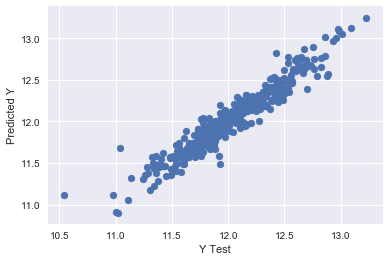

In [61]:
scatter_results(y_test, y_pred)

In [62]:
alpha = lasso.alpha_
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.006


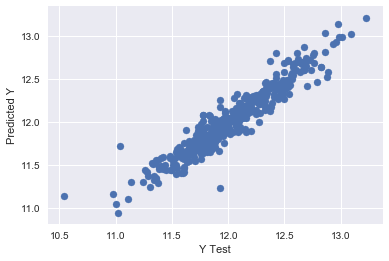

In [63]:
y_pred_las2 = lasso.predict(X_test)
plt.scatter(y_test, y_pred_las2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [64]:
errors(y_test, y_pred_las2)

MAE: 0.0868554274809
MSE: 0.0149688481495
RMSE: 0.122347244144


## Elastic

In [65]:
elastic = ElasticNetCV(alphas = [.01, .03, .06, .1, .3, .6, 1, 3, 6, 10, 30, 60], max_iter= 50000, cv=10,
                       l1_ratio=[.01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99])

In [66]:
elastic.fit(X_train, y_train)

ElasticNetCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60],
       copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
       max_iter=50000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [67]:
y_pred_elastic = elastic.predict(X_test)

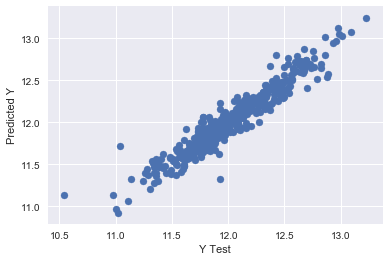

In [68]:
scatter_results(y_test, y_pred_elastic)

In [69]:
errors(y_test, y_pred_elastic)

MAE: 0.0849733514291
MSE: 0.0140370687778
RMSE: 0.118478136286


Ridge performed the best. Let's see if fixing skewness or adding polynomial terms improves anything

## Fixing Skewness

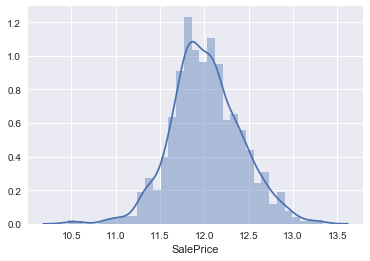

In [70]:
sns.distplot(y)

In [71]:
skewness = [[f, skew(df_train[f])] for f in df_train[quantitative].columns]

In [72]:
skewness = pd.DataFrame(skewness, columns = ["Feature", "skew"])

In [73]:
skewness.set_index("Feature", inplace=True)

In [74]:
skewness.sort_values("skew", ascending=False)

,skew
Feature,
MiscVal,24.418175
PoolArea,17.504556
LotArea,12.574590
3SsnPorch,10.279262
LowQualFinSF,8.989291
KitchenAbvGr,4.476748
BsmtFinSF2,4.244209
BsmtHalfBath,4.124712
ScreenPorch,4.111400


In [75]:
df_train2 = df_train.copy()

In [76]:
for feature in skewness.index:
    if abs(skew(df_train[feature])) > .75:
        df_train2[feature] = np.log1p(df_train[feature])

In [77]:
y = df_train2["SalePrice"]
X = df_train2.drop("SalePrice", axis=1)

In [78]:
regr = LinearRegression()

In [79]:
X_train, X_test, y_train, y_split = train_test_split(X, y, test_size = 0.3)

In [80]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
y_pred_norm = regr.predict(X_test)

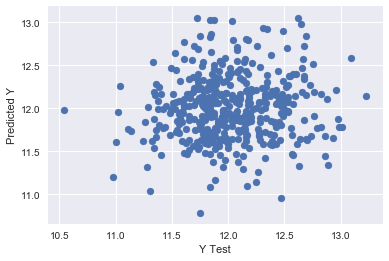

In [82]:
scatter_results(y_test, y_pred_norm)

In [83]:
errors(y_test, y_pred_norm)

MAE: 0.418159538139
MSE: 0.273889421256
RMSE: 0.523344457557


Ya that did not really work

## Adding quadratic terms

In [84]:
poly = PolynomialFeatures(degree=2, include_bias = False)

In [85]:
X = df_train.drop("SalePrice", axis=1)
y = np.log1p(df_train["SalePrice"])

In [86]:
X_train, X_test, y_train, y_split = train_test_split(X, y, test_size = 0.3)

In [87]:
the_X = poly.fit_transform(X)

In [88]:
re = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(re,parameters, cv=10)
grid.fit(the_X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [89]:
y_pred_quad = grid.predict(poly.fit_transform(X_test))

In [90]:
errors(y_test,  y_pred_quad)

MAE: 0.457024011285
MSE: 0.322619680016
RMSE: 0.567996197184


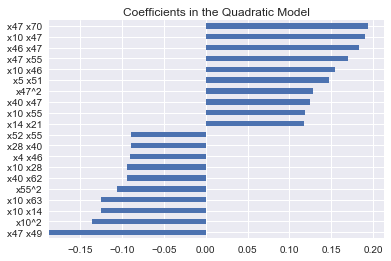

In [105]:
coefs = pd.Series(grid.best_estimator_.coef_, poly.get_feature_names())

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Quadratic Model")

In [106]:
coefs

x0        -1.995904e-04
x1         2.994298e-02
x2        -2.343613e-04
x3         1.180174e-06
x4        -4.529371e-02
x5         4.356819e-03
x6        -2.209413e-02
x7        -1.326828e-02
x8         1.060302e-02
x9        -2.457609e-02
x10       -8.999978e-03
x11        1.459150e-03
x12        2.101786e-02
x13        3.619931e-03
x14       -1.128973e-02
x15       -5.843130e-03
x16       -1.432741e-02
x17        3.611237e-02
x18       -1.417077e-04
x19        8.026731e-05
x20       -2.079081e-02
x21       -5.551973e-03
x22        4.042842e-03
x23        2.635783e-03
x24        1.228373e-02
x25        1.721090e-04
x26        2.923937e-02
x27        2.879709e-05
x28       -1.328577e-02
x29        1.543876e-02
               ...     
x72 x78    3.579197e-03
x72 x79    6.985395e-06
x73^2      9.179558e-10
x73 x74    2.386580e-06
x73 x75    6.152910e-10
x73 x76    1.204966e-06
x73 x77    4.307217e-06
x73 x78   -4.014407e-06
x73 x79   -6.078502e-09
x74^2     -3.218516e-03
x74 x75    2.876

In [92]:
all_columns = [f for f in df_train.columns]

In [93]:
df_train["Pool * BsmtHalfBath"] = df_train[all_columns[47]] * df_train[all_columns[70]]
#df_train["BsmtHalfBathSquared"] = df_train[all_columns[47]] **2
df_train["BsmtBaths"] = df_train[all_columns[46]] * df_train[all_columns[47]]
df_train["Slope * BsmtHalfBath"] = df_train[all_columns[10]] * df_train[all_columns[47]]
#df_train["Slope * BldgType"] = df_train[all_columns[10]] * df_train[all_columns[14]]
df_train["Slope * Paved"] = df_train[all_columns[10]] * df_train[all_columns[63]]
df_train["CountourSquared"] = df_train["LandContour"] **2
df_train["FirePlacesSquared"] = df_train[all_columns[55]]
df_train["NotBsmtHalfBath"] = df_train["HalfBath"] - df_train["BsmtHalfBath"]
df_train["Qual * Cond"] = df_train["OverallQual"] * df_train["OverallCond"]

In [94]:
reg = LinearRegression()
X = df_train.drop("SalePrice", axis=1)
y = np.log1p(df_train["SalePrice"])
X_train, X_test, y_train, y_split = train_test_split(X, y, test_size = 0.3)
reg.fit(X_train, y_train)
y_pred_new = reg.predict(X_test)

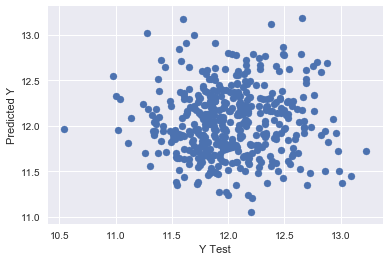

In [95]:
scatter_results(y_test, y_pred_new)

In [96]:
errors(y_test, y_pred_new)

MAE: 0.420733696175
MSE: 0.289581629145
RMSE: 0.538127892926


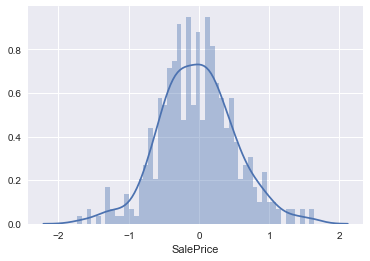

In [97]:
sns.distplot((y_test-y_pred_new),bins=50)

## Return to the Ridge

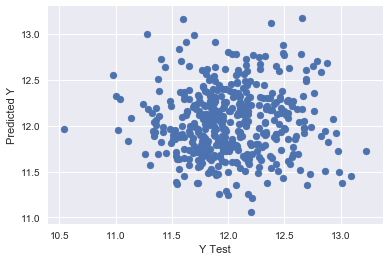

In [98]:
ridge = RidgeCV(alphas=[.01, .03, .06, .1, .3, .6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)
scatter_results(y_test, y_pred_rid)

In [99]:
errors(y_test, y_pred_rid)

MAE: 0.420330254274
MSE: 0.28899473786
RMSE: 0.537582307986


In [100]:
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)

ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0084


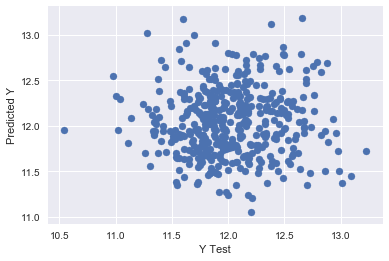

In [101]:
y_pred_rdg = ridge.predict(X_test)

scatter_results(y_test, y_pred_rdg)

In [102]:
errors(y_test, y_pred_rdg)

MAE: 0.420713657201
MSE: 0.289561842357
RMSE: 0.538109507775


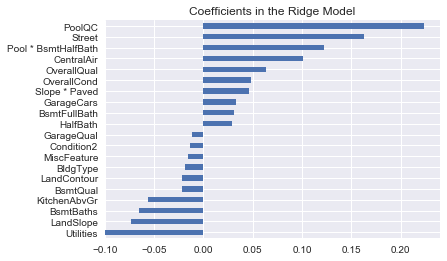

In [103]:
coefs = pd.Series(ridge.coef_, index = X_train.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")